## Libraries 

In [79]:
import pandas as pd
import numpy as np 
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,precision_score, accuracy_score, roc_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler

In [80]:
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

## Reading Data

In [81]:
df = pd.read_excel("Loan Data.xlsx")

Reading Data

## DataFrame

In [82]:
df

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19,4,0,1,0,R,0,O,14464,4,0,0,0,0,0
1,41,2,0,1,0,P,36000,O,0,0,280,664,0,80,0
2,66,0,0,1,0,N,30000,N,0,0,0,0,0,0,0
3,51,2,0,1,0,P,464,O,24928,8464,584,320,0,60,0
4,65,0,0,1,0,P,15000,P,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52,4,1,1,0,V,37764,U,0,0,0,340,0,0,0
1221,56,3,0,1,1200,P,31500,O,6928,46464,784,256,0,0,1
1222,60,0,0,1,0,E,46800,O,11392,928,1144,680,0,108,0
1223,20,0,0,1,0,R,0,N,0,0,0,0,0,0,1


## Attributes

yob: _Year of birth, represented as a numeric value. If unknown, the year is represented as 99.


nkid: _Number of children, represented as a numeric value.

dep: _Number of other dependents, represented as a numeric value.

phon: _Indicates whether there is a home phone, represented as a binary value. 1 represents yes, while 0 represents no.

sinc: _Spouse's income, represented as a numeric value.

aes: _Applicant's employment status, represented as a categorical value. The possible values are:

    V = _Government
    W = _housewife
    M = _military
    P = _private sector
    B = _public sector
    R = _retired
    E = _self employed
    T = _student
    U = _unemployed
    N = _others
    Z = _no response
dainc: _Applicant's income, represented as a numeric value.

res: _Residential status, represented as a categorical value. The possible values are:

    O = Owner
    F = tenant furnished
    U = Tenant Unfurnished
    P = With parents
    N = Other
    Z = No response
dhval: _Value of Home, represented as a numeric value. If there is no response or the applicant is not an owner, the value is _represented as 0. If the value is zero, it is represented as 000001.

dmort: _Mortgage balance outstanding, represented as a numeric value. If there is no response or the applicant is not an owner, _the value is represented as 0. If the balance is zero, it is represented as 000001.

doutm: _Outgoings on mortgage or rent, represented as a numeric value.

doutl: _Outgoings on loans, represented as a numeric value.

douthp: _Outgoings on Hire Purchase, represented as a numeric value.

doutcc: _Outgoings on credit cards, represented as a numeric value.

Bad: _Good/bad indicator, represented as a binary value. 1 represents bad, while 0 represents good.

# Preprocessing

## Renaming

In [83]:
df = df.rename(columns={
    'YOB': 'year_of_birth',
    'NKID': 'number_of_children',
    'DEP': 'number_of_dependents',
    'PHON': 'has_home_phone',
    'SINC': "spouse_income",
    'AES': 'employment_status',
    'DAINC': 'applicant_income',
    'RES': 'residential_status',
    'DHVAL': 'home_value',
    'DMORT': 'mortgage_balance',
    'DOUTM': 'mortgage_or_rent_expenses',
    'DOUTL': 'loan_expenses',
    'DOUTHP': 'hire_purchase_expenses',
    'DOUTCC': 'credit_card_expenses',
    'BAD': 'good_or_bad'
})


In [84]:
df

,year_of_birth,number_of_children,number_of_dependents,has_home_phone,spouse_income,employment_status,applicant_income,residential_status,home_value,mortgage_balance,mortgage_or_rent_expenses,loan_expenses,hire_purchase_expenses,credit_card_expenses,good_or_bad
0,19,4,0,1,0,R,0,O,14464,4,0,0,0,0,0
1,41,2,0,1,0,P,36000,O,0,0,280,664,0,80,0
2,66,0,0,1,0,N,30000,N,0,0,0,0,0,0,0
3,51,2,0,1,0,P,464,O,24928,8464,584,320,0,60,0
4,65,0,0,1,0,P,15000,P,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52,4,1,1,0,V,37764,U,0,0,0,340,0,0,0
1221,56,3,0,1,1200,P,31500,O,6928,46464,784,256,0,0,1
1222,60,0,0,1,0,E,46800,O,11392,928,1144,680,0,108,0
1223,20,0,0,1,0,R,0,N,0,0,0,0,0,0,1


## Null Values

In [85]:
# Count total NaN at each column in a df
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 year_of_birth                0
number_of_children           0
number_of_dependents         0
has_home_phone               0
spouse_income                0
employment_status            0
applicant_income             0
residential_status           0
home_value                   0
mortgage_balance             0
mortgage_or_rent_expenses    0
loan_expenses                0
hire_purchase_expenses       0
credit_card_expenses         0
good_or_bad                  0
dtype: int64


There are **Zero** NULL Values in the Dataset

## Statistics

In [86]:
statistics = df.describe()
statistics

,year_of_birth,number_of_children,number_of_dependents,has_home_phone,spouse_income,applicant_income,home_value,mortgage_balance,mortgage_or_rent_expenses,loan_expenses,hire_purchase_expenses,credit_card_expenses,good_or_bad
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,51.037551,0.623673,0.038367,0.903673,1990.084898,21244.211429,15693.857959,11225.691429,342.004898,121.926531,28.721633,39.595102,0.263673
std,15.301818,1.016013,0.219917,0.295159,4802.341425,15896.207986,20736.331833,18889.207107,427.993865,839.639588,119.324084,168.697101,0.440804
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,19500.000000,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,1.000000,1040.000000,30600.000000,28928.000000,20000.000000,528.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,5.000000,2.000000,1.000000,50000.000000,64800.000000,64928.000000,64000.000000,3800.000000,28000.000000,1600.000000,2800.000000,1.000000


## Useful information from Data

The dataset contains 1225 observations

The mean age of the applicants is around 51 years.

On average, the applicants have around 0.6 children and 0.04 dependents.

The majority of applicants (around 90%) have a home phone.

The mean income of the spouse is around 1990, while the mean income of the applicant is around 21244.

The mean home value is around 15693, and the mean mortgage balance is around 11225.

On average, the applicants spend around 342 on mortgage or rent expenses.

On average, the applicants spend around 121 on loan expenses, 29 on hire purchase expenses, and 40 on credit card expenses.

Around 26% of applicants are classified as "good" (i.e., they have a good credit rating).

## Duplicates

Checking Duplicates from the Dataset

In [87]:
# check for duplicates
duplicates = df[df.duplicated(keep=False)]

# print the duplicates
duplicates

,year_of_birth,number_of_children,number_of_dependents,has_home_phone,spouse_income,employment_status,applicant_income,residential_status,home_value,mortgage_balance,mortgage_or_rent_expenses,loan_expenses,hire_purchase_expenses,credit_card_expenses,good_or_bad
4,65,0,0,1,0,P,15000,P,0,0,0,0,0,0,0
74,67,0,0,1,0,T,0,P,0,0,0,0,0,0,0
183,67,0,0,1,0,T,0,P,0,0,0,0,0,0,0
326,64,0,0,1,0,V,36000,P,0,0,0,0,0,0,0
356,67,0,0,1,0,T,0,P,0,0,0,0,0,0,0
404,65,0,0,1,0,P,15000,P,0,0,0,0,0,0,0
428,68,0,0,1,0,T,0,P,0,0,0,0,0,0,0
446,67,0,0,1,0,T,0,P,0,0,0,0,0,0,0
464,67,0,0,1,0,T,0,N,0,0,0,0,0,0,0
495,64,0,0,1,0,T,0,P,0,0,0,0,0,0,0


Removing Duplicates from the Dataset

In [88]:
# drop duplicates and print the resulting DataFrame
df = df.drop_duplicates()
df

,year_of_birth,number_of_children,number_of_dependents,has_home_phone,spouse_income,employment_status,applicant_income,residential_status,home_value,mortgage_balance,mortgage_or_rent_expenses,loan_expenses,hire_purchase_expenses,credit_card_expenses,good_or_bad
0,19,4,0,1,0,R,0,O,14464,4,0,0,0,0,0
1,41,2,0,1,0,P,36000,O,0,0,280,664,0,80,0
2,66,0,0,1,0,N,30000,N,0,0,0,0,0,0,0
3,51,2,0,1,0,P,464,O,24928,8464,584,320,0,60,0
4,65,0,0,1,0,P,15000,P,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52,4,1,1,0,V,37764,U,0,0,0,340,0,0,0
1221,56,3,0,1,1200,P,31500,O,6928,46464,784,256,0,0,1
1222,60,0,0,1,0,E,46800,O,11392,928,1144,680,0,108,0
1223,20,0,0,1,0,R,0,N,0,0,0,0,0,0,1


## Outliers 

### number of outliers present in the data

In [89]:
# Define the columns you want to check for outliers
cols = ['year_of_birth', 'number_of_children', 
        'number_of_dependents', 'applicant_income', 
        'spouse_income', 'home_value', 'mortgage_balance',
        'mortgage_or_rent_expenses', 'loan_expenses',
        'hire_purchase_expenses', 
        'credit_card_expenses']

# Calculate the IQR for each column
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Find the outliers
outliers = ((df[cols] < (Q1 - threshold * IQR)) | (df[cols] > (Q3 + threshold * IQR)))

# Count the number of outliers in each column
num_outliers = outliers.sum()

# Print the number of outliers in each column
print(num_outliers)


year_of_birth                 20
number_of_children            76
number_of_dependents          40
applicant_income               2
spouse_income                219
home_value                     0
mortgage_balance              98
mortgage_or_rent_expenses     45
loan_expenses                300
hire_purchase_expenses       129
credit_card_expenses         211
dtype: int64


Outliers could represent unique and significant characteristics of individuals that impact their credit score, and removing them might lead to losing valuable information.

## Inconsistent data

#### Checking negative values 

In [90]:
negatives = df[cols].lt(0).sum()
print(negatives)


year_of_birth                0
number_of_children           0
number_of_dependents         0
applicant_income             0
spouse_income                0
home_value                   0
mortgage_balance             0
mortgage_or_rent_expenses    0
loan_expenses                0
hire_purchase_expenses       0
credit_card_expenses         0
dtype: int64


No Negative Values 

## Distribution 

Checking Normal Distribution of the Dataset

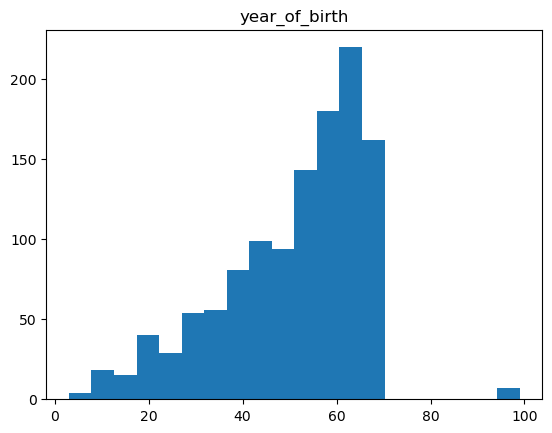

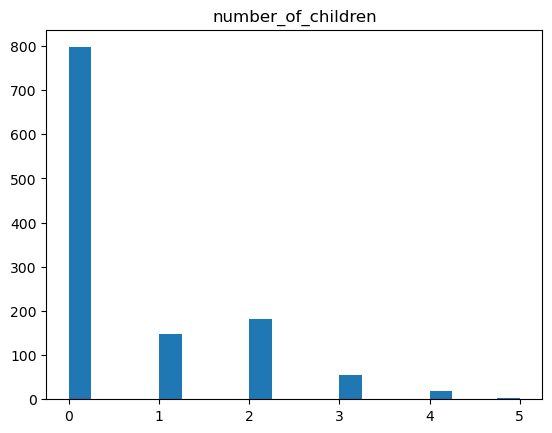

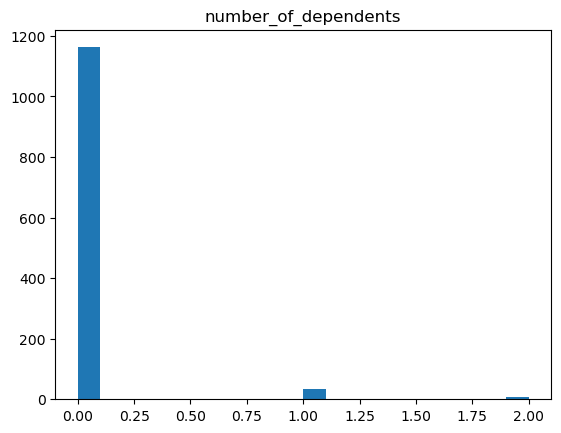

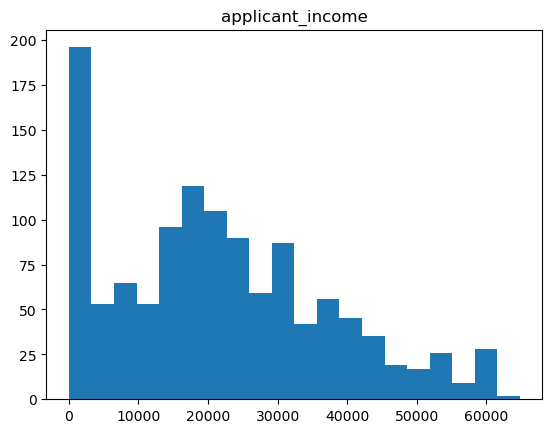

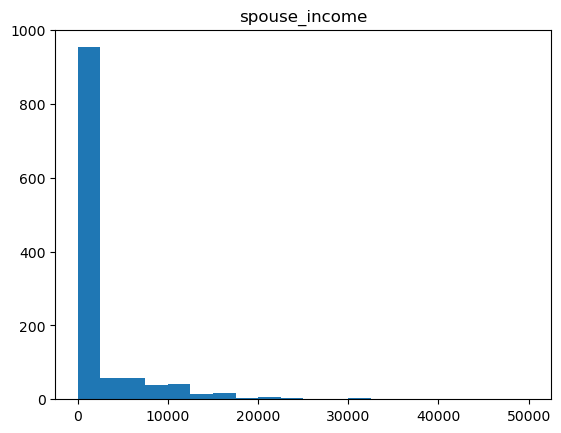

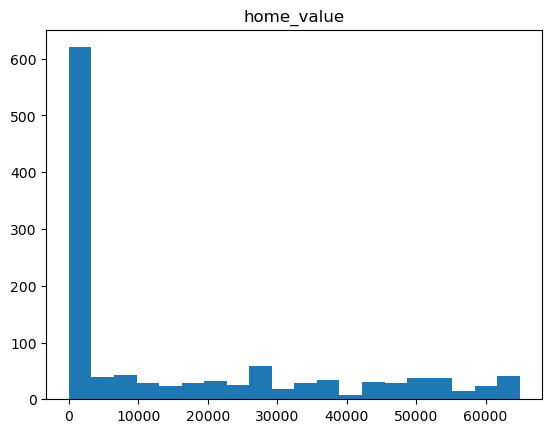

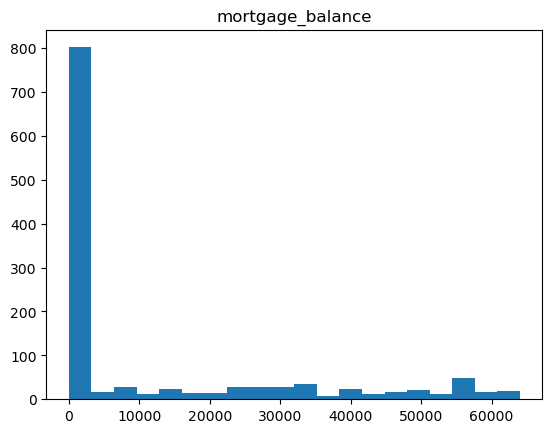

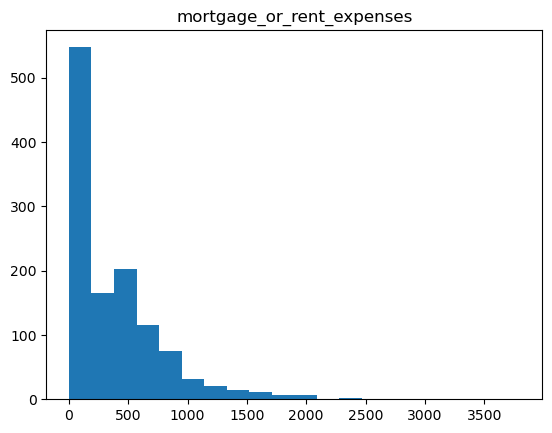

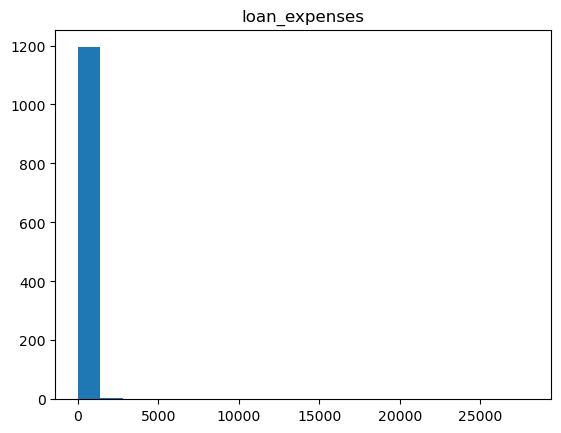

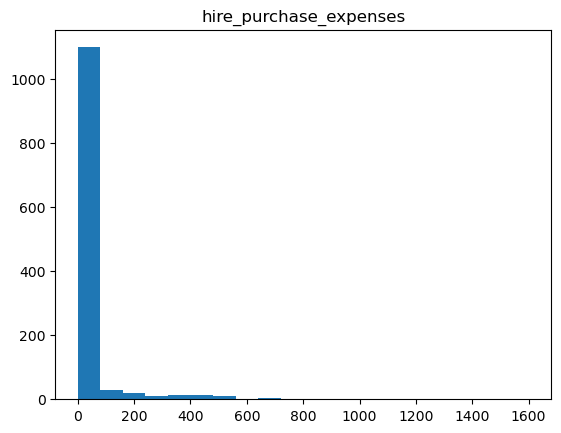

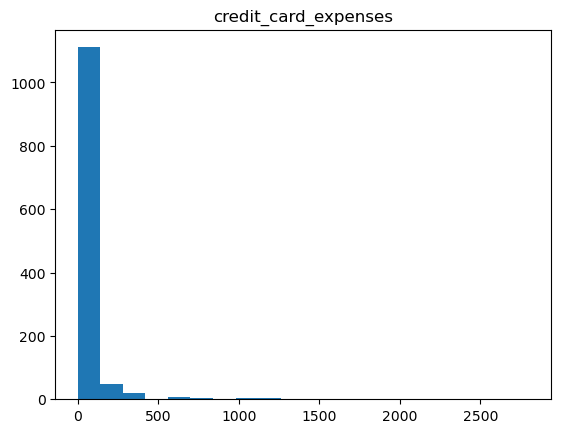

In [91]:
cols = ['year_of_birth', 'number_of_children', 
        'number_of_dependents', 'applicant_income', 
        'spouse_income', 'home_value', 'mortgage_balance',
        'mortgage_or_rent_expenses', 'loan_expenses',
        'hire_purchase_expenses', 
        'credit_card_expenses']

for col in cols:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()


## Exploratory Data Analysis 

### Data Visualization 

#### Histogram of age

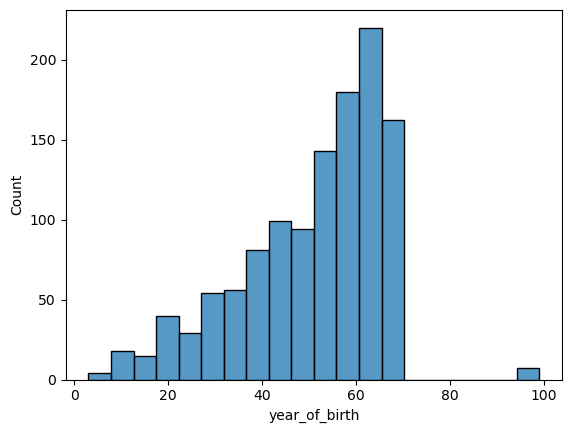

In [92]:
sns.histplot(data=df, x="year_of_birth", bins=20)
plt.show()

Mostly clients are Young, they belong to age group of 50-60 years. 

#### Bar chart of number of children

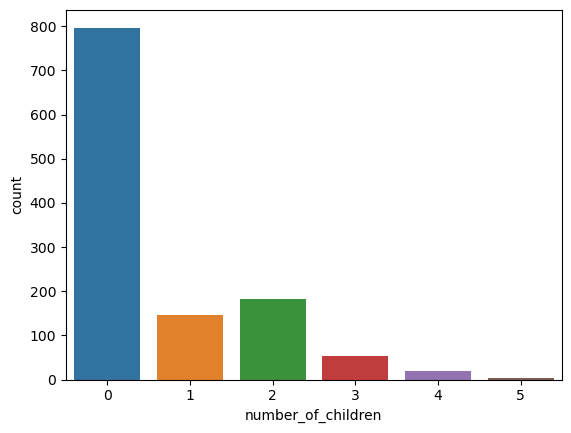

In [93]:
sns.countplot(data=df, x="number_of_children")
plt.show()

Most of the clients do not have any children 

#### Bar chart of number of dependents

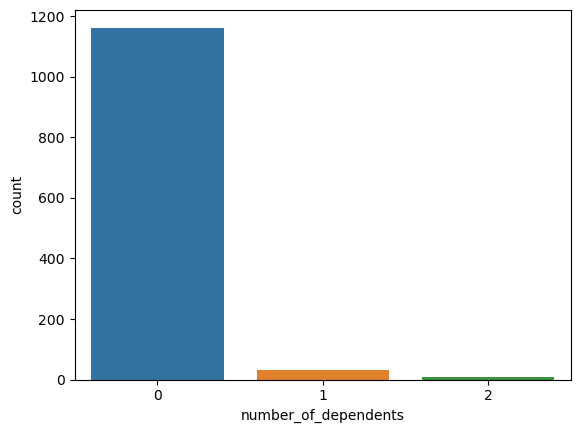

In [94]:
sns.countplot(data=df, x="number_of_dependents")
plt.show()

Most of the clients also do not have any dependents 

#### Bar chart of presence of home phone

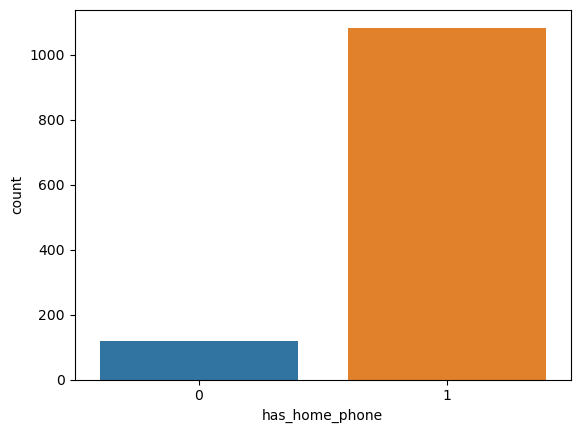

In [95]:
sns.countplot(data=df, x="has_home_phone")
plt.show()

Most of the clients possess home phone

#### Box plot of home value by good or bad credit

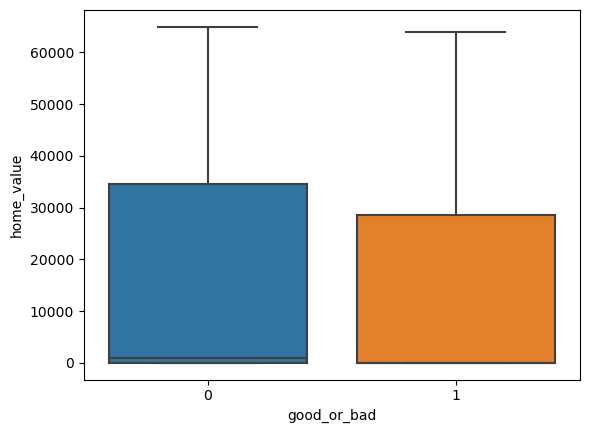

In [97]:
sns.boxplot(data=df, x="good_or_bad", y="home_value")
plt.show()

Those clients who belong to Bad Creditor Group have high home value

#### Histogram of applicant income

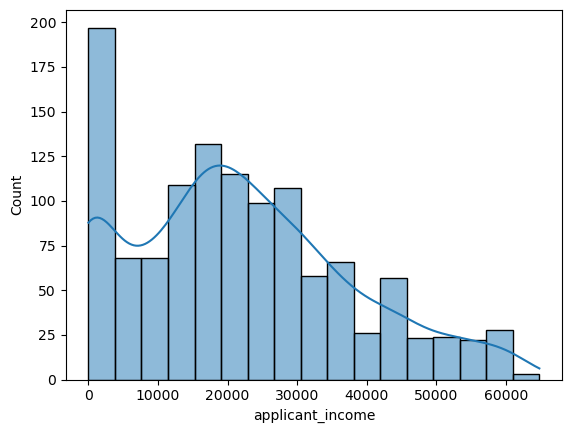

In [98]:
sns.histplot(data=df, x="applicant_income", kde=True)
plt.show()

Clients income is not stable, its flactuating. Averaging about 20000

#### Bar plot of employment status by good or bad credit

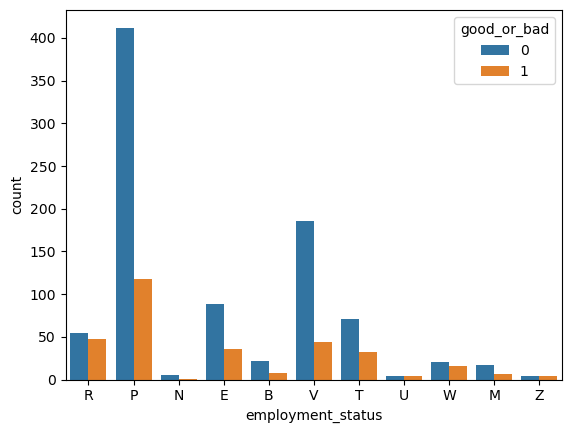

In [99]:
sns.countplot(data=df, x="employment_status", hue="good_or_bad")
plt.show()

#### Heatmap of correlation matrix

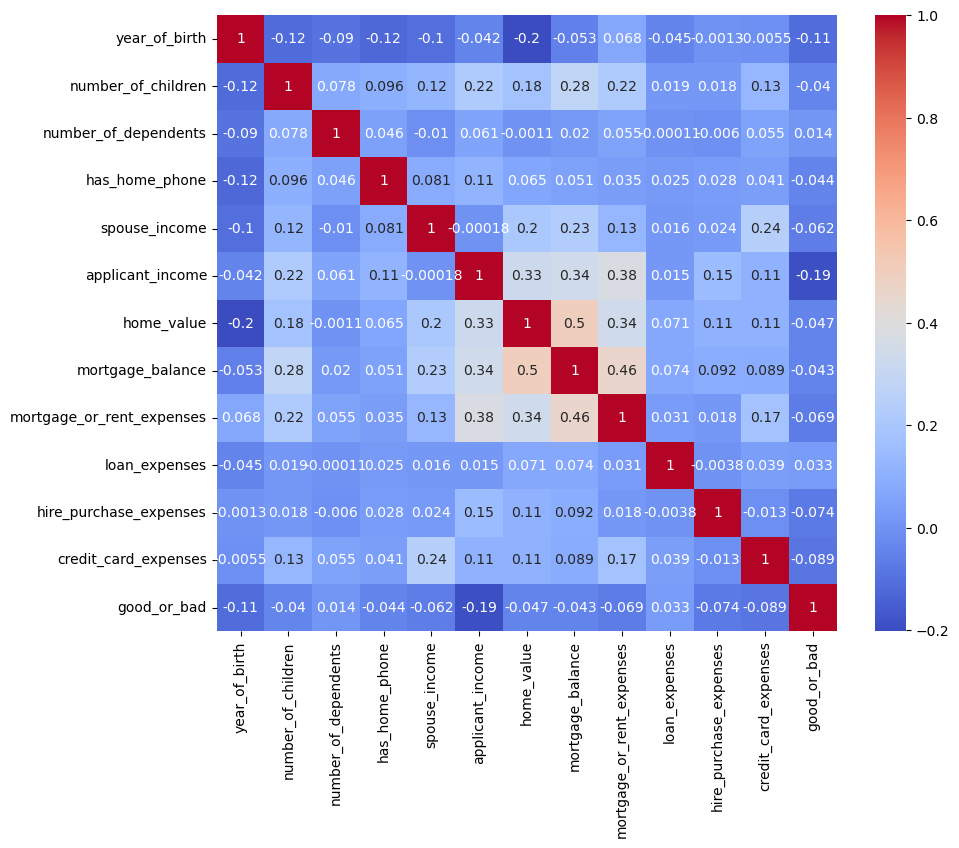

In [100]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
plt.show()

#### Scatter plot matrix of multiple variables

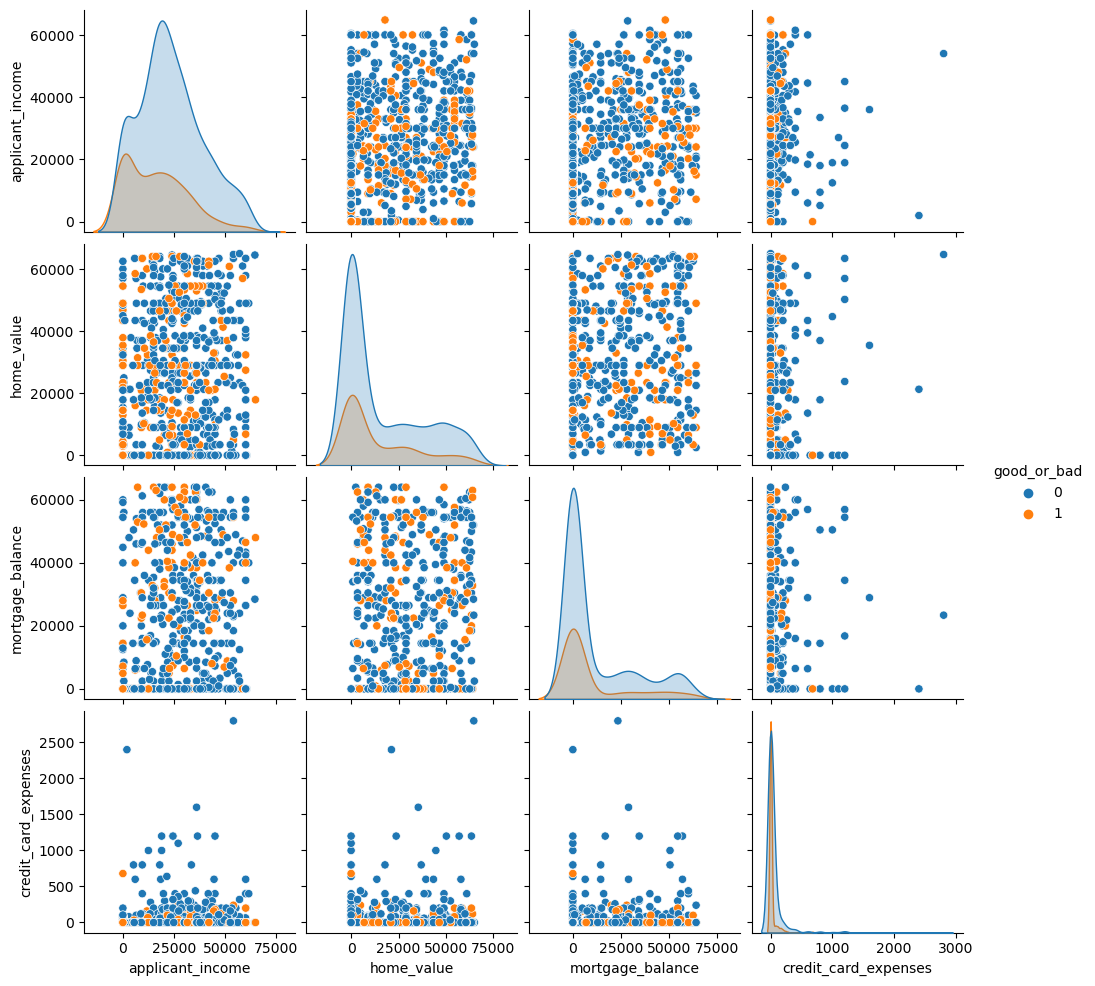

In [101]:
sns.pairplot(data=df, vars=["applicant_income", "home_value", "mortgage_balance", "credit_card_expenses"], hue="good_or_bad")
plt.show()

## Normalization 

In [102]:
# select columns to normalize
cols_to_normalize = ['year_of_birth', 'number_of_children', 'number_of_dependents', 'spouse_income', 
                     'applicant_income', 'home_value', 'mortgage_balance', 'mortgage_or_rent_expenses', 
                     'loan_expenses', 'hire_purchase_expenses', 'credit_card_expenses']

# create a MinMaxScaler object
scaler = MinMaxScaler()
# fit and transform the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


In [103]:
df.head(10)

,year_of_birth,number_of_children,number_of_dependents,has_home_phone,spouse_income,employment_status,applicant_income,residential_status,home_value,mortgage_balance,mortgage_or_rent_expenses,loan_expenses,hire_purchase_expenses,credit_card_expenses,good_or_bad
0,0.166667,0.8,0.0,1,0.00,R,0.000000,O,0.222770,0.000063,0.000000,0.000000,0.00,0.000000,0
1,0.395833,0.4,0.0,1,0.00,P,0.555556,O,0.000000,0.000000,0.073684,0.023714,0.00,0.028571,0
2,0.656250,0.0,0.0,1,0.00,N,0.462963,N,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0
3,0.500000,0.4,0.0,1,0.00,P,0.007160,O,0.383933,0.132250,0.153684,0.011429,0.00,0.021429,0
4,0.645833,0.0,0.0,1,0.00,P,0.231481,P,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0
5,0.406250,0.4,0.0,1,0.21,E,0.740741,O,0.668310,0.726000,0.294737,0.000000,0.00,0.000000,0
6,0.583333,0.0,0.0,1,0.13,B,0.462963,O,0.962050,0.875000,0.136842,0.000000,0.06,0.000000,0
7,0.416667,0.2,0.0,1,0.27,E,0.138889,O,0.976343,0.851000,0.000000,0.007143,0.00,0.000000,0
8,0.510417,0.0,0.0,1,0.00,E,0.347222,P,0.000000,0.000000,0.000000,0.007143,0.00,0.028571,0
9,0.645833,0.0,0.0,1,0.00,P,0.300926,O,0.407590,0.069750,0.142105,0.000000,0.00,0.000000,0


## Encoding 

### One-Hot Encoding

In [104]:
# One-Hot Encoding for employment_status and residential_status
df1 = pd.get_dummies(df, columns=['employment_status', 'residential_status'], prefix=['employment', 'residential'])
df1

,year_of_birth,number_of_children,number_of_dependents,has_home_phone,spouse_income,applicant_income,home_value,mortgage_balance,mortgage_or_rent_expenses,loan_expenses,...,employment_T,employment_U,employment_V,employment_W,employment_Z,residential_F,residential_N,residential_O,residential_P,residential_U
0,0.166667,0.8,0.0,1,0.000,0.000000,0.222770,0.000063,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
1,0.395833,0.4,0.0,1,0.000,0.555556,0.000000,0.000000,0.073684,0.023714,...,0,0,0,0,0,0,0,1,0,0
2,0.656250,0.0,0.0,1,0.000,0.462963,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,0.500000,0.4,0.0,1,0.000,0.007160,0.383933,0.132250,0.153684,0.011429,...,0,0,0,0,0,0,0,1,0,0
4,0.645833,0.0,0.0,1,0.000,0.231481,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,0.510417,0.8,0.5,1,0.000,0.582778,0.000000,0.000000,0.000000,0.012143,...,0,0,1,0,0,0,0,0,0,1
1221,0.552083,0.6,0.0,1,0.024,0.486111,0.106703,0.726000,0.206316,0.009143,...,0,0,0,0,0,0,0,1,0,0
1222,0.593750,0.0,0.0,1,0.000,0.722222,0.175456,0.014500,0.301053,0.024286,...,0,0,0,0,0,0,0,1,0,0
1223,0.177083,0.0,0.0,1,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0


## Naive Bayes

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81       264
           1       0.43      0.33      0.37        97

    accuracy                           0.70       361
   macro avg       0.60      0.59      0.59       361
weighted avg       0.68      0.70      0.69       361

Naive Bayes Accuracy: 0.703601108033241
Naive Bayes 10-fold CV Mean: 0.6546625344352617
Naive Bayes 10-fold CV Std: 0.10892977937640166
Naive Bayes AUC: 0.5854029990627928


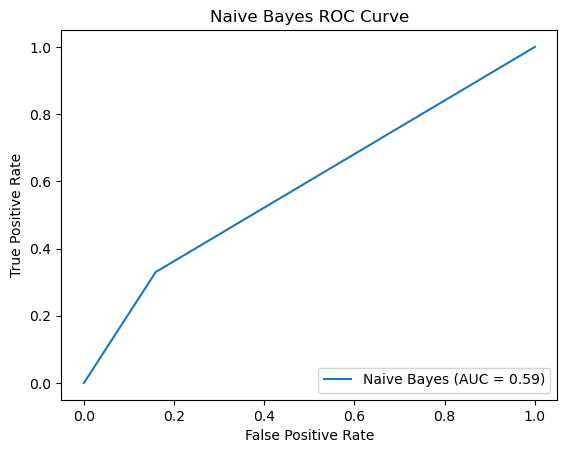

In [105]:
# Split the data into training and testing sets
X = df1.drop('good_or_bad', axis=1)
y = df1['good_or_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb.predict(X_test)

# Evaluate the model
nb_acc = accuracy_score(y_test, nb_pred)
nb_cr = classification_report(y_test, nb_pred)

# Perform 10-fold cross-validation
nb_cv_scores = cross_val_score(nb, X, y, cv=10)
nb_cv_mean = nb_cv_scores.mean()
nb_cv_std = nb_cv_scores.std()

# Calculate the false positive rate and true positive rate for the ROC curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)

# Calculate the area under the curve (AUC) for the ROC curve
nb_auc = auc(nb_fpr, nb_tpr)

# Print the results
print('Naive Bayes Classification Report:\n', nb_cr)
print('Naive Bayes Accuracy:', nb_acc)
print('Naive Bayes 10-fold CV Mean:', nb_cv_mean)
print('Naive Bayes 10-fold CV Std:', nb_cv_std)
print('Naive Bayes AUC:', nb_auc)

# Plot the ROC curve
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.legend(loc="lower right")
plt.title('Naive Bayes ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


The Naive Bayes classification model achieved an accuracy of 70% on the dataset, with a precision of 0.77 for class 0 and 0.43 for class 1. However, recall for class 1 is relatively low at 0.33, resulting in an F1-score of 0.37 for class 1.

In a 10-fold cross-validation, the Naive Bayes model had a mean accuracy of approximately 65.5% with a standard deviation of about 10.9%. The area under the ROC curve (AUC) for the model is 0.585, indicating its ability to discriminate between the classes.

In [106]:
from sklearn import metrics

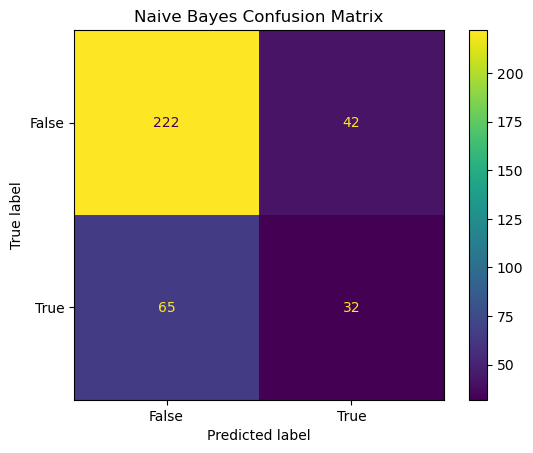

In [107]:
nb_cm = metrics.confusion_matrix(y_test, nb_pred)
nb_display = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_cm, display_labels = [False, True])
nb_display.plot()
plt.title('Naive Bayes Confusion Matrix')
plt.show()

## Decision Tree

Decision Tree Cross-Validation Scores: [0.62352941 0.63095238 0.70238095 0.60714286 0.64285714 0.63095238
 0.6547619  0.6547619  0.64285714 0.54761905]
Mean Cross-Validation Score: 0.633781512605042


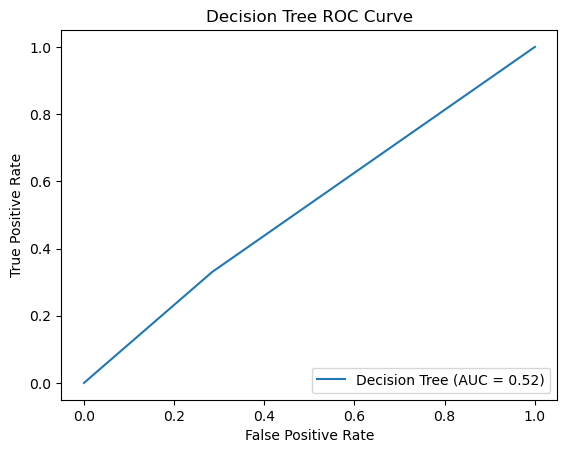

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       264
           1       0.30      0.33      0.31        97

    accuracy                           0.61       361
   macro avg       0.52      0.52      0.52       361
weighted avg       0.62      0.61      0.62       361

Decision Tree Accuracy: 0.6121883656509696


In [108]:
# Split the data into training and testing sets
X = df1.drop('good_or_bad', axis=1)
y = df1['good_or_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using 10-fold cross-validation
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, y_train, cv=10)

# Print the cross-validation scores and mean score
print('Decision Tree Cross-Validation Scores:', dt_scores)
print('Mean Cross-Validation Score:', dt_scores.mean())

# Fit the model on the training set
dt.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt.predict(X_test)

# Evaluate the model
dt_acc = accuracy_score(y_test, dt_pred)
dt_cr = classification_report(y_test, dt_pred)

# Calculate the false positive rate and true positive rate for the ROC curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)

# Calculate the area under the curve (AUC) for the ROC curve
dt_auc = auc(dt_fpr, dt_tpr)

# Plot the ROC curve
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.legend(loc="lower right")
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Print the classification report and accuracy score
print('Decision Tree Classification Report:\n', dt_cr)
print('Decision Tree Accuracy:', dt_acc)


The Decision Tree classification model achieved an accuracy of 61.2% on the dataset. It showed a precision of 0.74 for class 0 and 0.30 for class 1, with recall values of 0.72 and 0.33, respectively, resulting in F1-scores of 0.73 for class 0 and 0.31 for class 1.

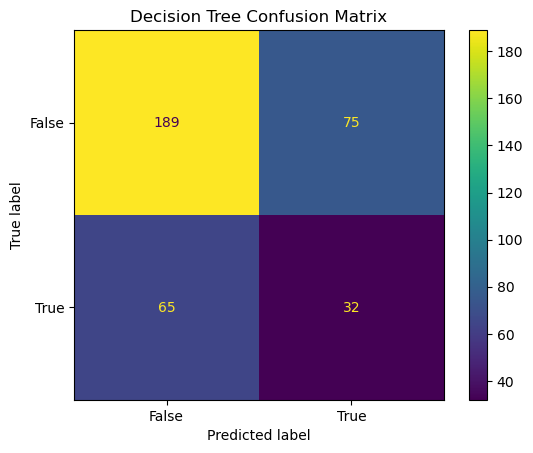

In [109]:
dt_cm = metrics.confusion_matrix(y_test, dt_pred)
dt_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dt_cm, display_labels = [False, True])
dt_display.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

## Logistic Regression 

Logistic Regression Cross-Validation Scores: [0.71764706 0.71428571 0.71428571 0.75       0.71428571 0.75
 0.73809524 0.71428571 0.75       0.73809524]
Mean Cross-Validation Score: 0.7300980392156864


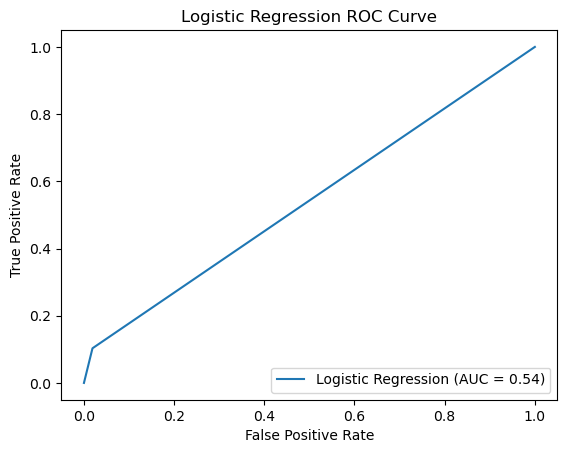

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85       264
           1       0.67      0.10      0.18        97

    accuracy                           0.75       361
   macro avg       0.71      0.54      0.51       361
weighted avg       0.73      0.75      0.67       361

Logistic Regression Accuracy: 0.7451523545706371


In [110]:
# Split the data into training and testing sets
X = df1.drop('good_or_bad', axis=1)
y = df1['good_or_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression classifier
lr = LogisticRegression()

# Train the model using 10-fold cross-validation
lr_scores = cross_val_score(lr, X_train, y_train, cv=10)

# Print the cross-validation scores and mean score
print('Logistic Regression Cross-Validation Scores:', lr_scores)
print('Mean Cross-Validation Score:', lr_scores.mean())

# Fit the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr.predict(X_test)

# Evaluate the model
lr_acc = accuracy_score(y_test, lr_pred)
lr_cr = classification_report(y_test, lr_pred)

# Calculate the false positive rate and true positive rate for the ROC curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)

# Calculate the area under the curve (AUC) for the ROC curve using sklearn's auc function
lr_auc = auc(lr_fpr, lr_tpr)

# Plot the ROC curve for Logistic Regression
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)

# Add labels and legend
plt.legend(loc="lower right")
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Print the classification report and accuracy score for Logistic Regression
print('Logistic Regression Classification Report:\n', lr_cr)
print('Logistic Regression Accuracy:', lr_acc)

The Logistic Regression model achieves an overall accuracy of approximately 74.52%, with high precision for negative cases (75%) but relatively low recall (10%) for positive cases. This indicates effective identification of non-default cases but potential room for improvement in capturing positive cases.

## Findings Table

In [113]:
# Create a list of models and their evaluation metrics
models = ['Naive Bayes', 'Decision Tree', 'Logistic Regression']
accuracy = [nb_acc, dt_acc, lr_acc]
precision = [nb_cr.split()[5], dt_cr.split()[5], lr_cr.split()[5]]
recall = [nb_cr.split()[6], dt_cr.split()[6], lr_cr.split()[6]]
f_measure = [nb_cr.split()[7], dt_cr.split()[7], lr_cr.split()[7]]
auc = [nb_auc, dt_auc, lr_auc]

# Create a DataFrame to store the results
results = pd.DataFrame({'Model': models,
                        'Accuracy': accuracy,
                        'Precision': precision,
                        'Recall': recall,
                        'F-Measure': f_measure,
                        'AUC': auc})

# Print the results
print(results)

                 Model  Accuracy Precision Recall F-Measure       AUC
0          Naive Bayes  0.703601      0.77   0.84      0.81  0.585403
1        Decision Tree  0.612188      0.74   0.72      0.73  0.522903
2  Logistic Regression  0.745152      0.75   0.98      0.85  0.542077


This table summarizes the performance metrics of three different machine learning models: __Naive Bayes, Decision Tree, and Logistic Regression__. The metrics include accuracy, precision, recall, F-measure, and the area under the curve (AUC). **Logistic Regression** achieved the highest accuracy and recall, making it a promising choice for this classification task.

## ROC Curve

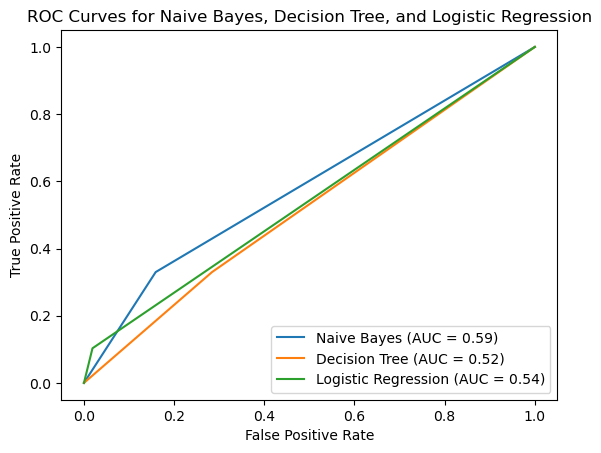

In [114]:
# Plot the ROC curves for the three models
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)

# Set the plot title and axis labels
plt.title('ROC Curves for Naive Bayes, Decision Tree, and Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend(loc="lower right")

# Show the plot
plt.show()


Based on AUC alone, Naive Bayes performs the best among the three models, indicating its effectiveness in distinguishing between classes. However, it's important to note that AUC is just one metric, and the choice of the best model should consider other relevant metrics like accuracy, precision, recall, and F-measure. So we choosed Logistic Regression as best model considering all metrics 